In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the dataset
data = pd.read_csv('life_expectancy.csv')

In [34]:
# Display the first few rows of the dataset 
data.head()

,Country,Year,Status,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total_expenditure,GDP,BMI,thinness_1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


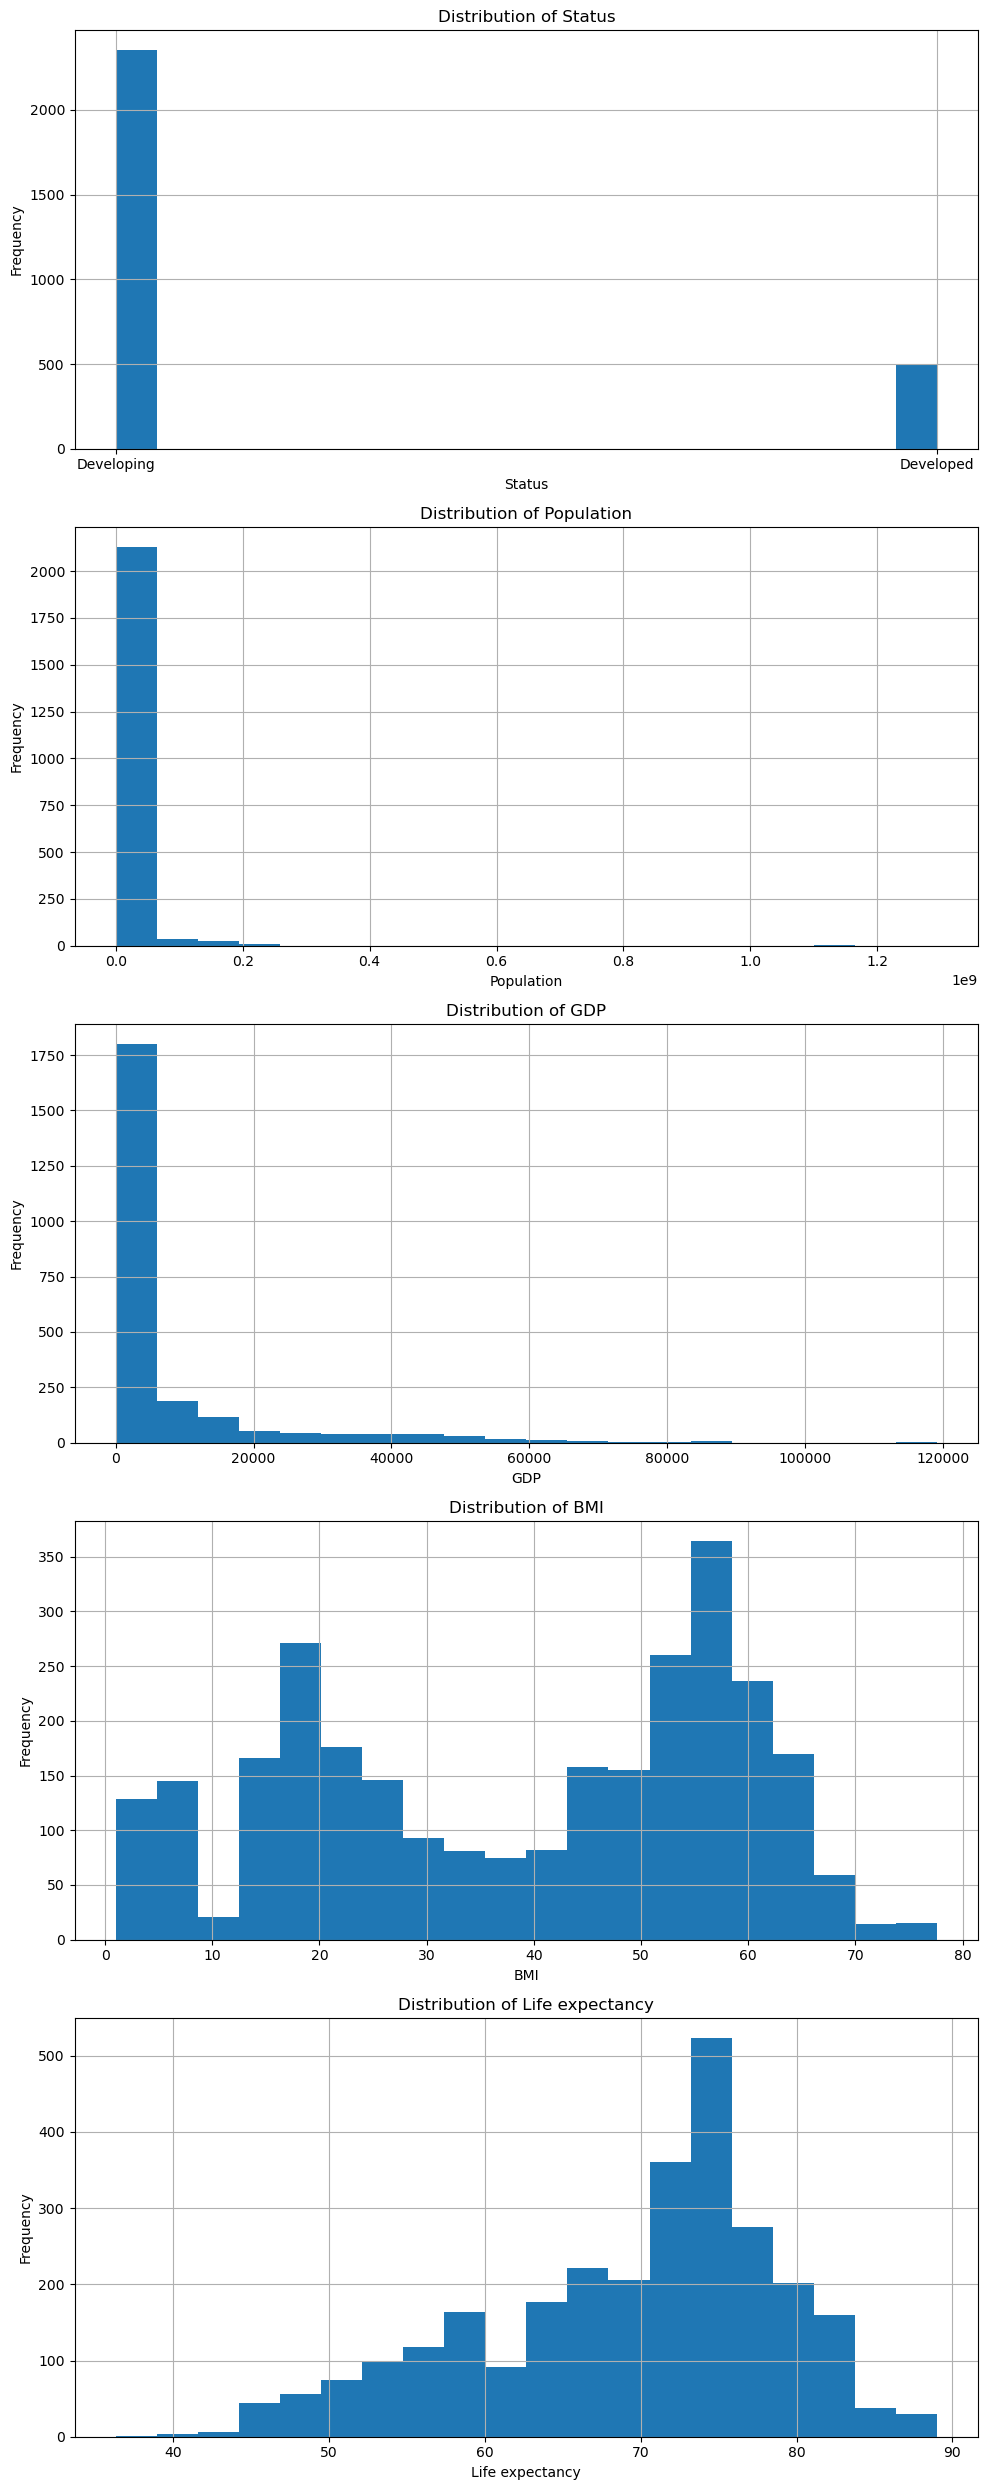

In [35]:
def create_histograms(data, variables, bins=10):
    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5*len(variables)))
    if len(variables) == 1:
        axes = [axes]
    for ax, var in zip(axes, variables):
        data[var].hist(bins=bins, ax=ax)
        ax.set_title(f'Distribution of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# List of variables to create histograms for
variables = ['Status', 'Population', 'GDP', 'BMI', 'Life expectancy']

create_histograms(data, variables, bins=20)


In [36]:
# Calculate mode, mean, spread (standard deviation), and identify tails (skewness) 
variables = ['Population', 'GDP', 'BMI', 'Life expectancy']
summary_stats = pd.DataFrame(index=['Mode', 'Mean', 'Standard Deviation', 'Skewness'], columns=variables)

for variable in variables:
    summary_stats.loc['Mode', variable] = data[variable].mode()[0]  
    summary_stats.loc['Mean', variable] = data[variable].mean()
    summary_stats.loc['Standard Deviation', variable] = data[variable].std()
    summary_stats.loc['Skewness', variable] = data[variable].skew()

summary_stats


,Population,GDP,BMI,Life expectancy
Mode,444.0,1.68135,58.5,73.0
Mean,12834572.124519,7664.398813,38.503374,69.347402
Standard Deviation,61960940.703136,14466.241793,19.955485,9.528332
Skewness,15.752943,3.150784,-0.252676,-0.662606


In [37]:
# Filter data for Developed and Developing countries
developed_data = data[data['Status'] == 'Developed']['Life expectancy'].dropna()
developing_data = data[data['Status'] == 'Developing']['Life expectancy'].dropna()

# Calculate PMFs
def calculate_pmf(series):
    counts = series.value_counts().sort_index()
    pmf = counts / counts.sum()
    return pmf.index, pmf.values

# Developed countries
developed_life_exp_values, developed_pmf = calculate_pmf(developed_data)

# Developing countries
developing_life_exp_values, developing_pmf = calculate_pmf(developing_data)

(developed_life_exp_values, developed_pmf), (developing_life_exp_values, developing_pmf)


((Index([71.1, 71.2, 71.4, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2,
         ...
         83.3, 83.4, 83.5, 83.7, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0],
        dtype='float64', name='Life expectancy', length=119),
  array([0.00604839, 0.00201613, 0.00201613, 0.00806452, 0.00403226,
         0.00201613, 0.00201613, 0.00403226, 0.00201613, 0.00604839,
         0.00201613, 0.00201613, 0.00604839, 0.00201613, 0.00201613,
         0.00806452, 0.00604839, 0.00403226, 0.00201613, 0.00201613,
         0.00806452, 0.00201613, 0.00201613, 0.00604839, 0.00201613,
         0.00201613, 0.00201613, 0.00604839, 0.00403226, 0.00604839,
         0.00403226, 0.00604839, 0.00201613, 0.01008065, 0.00604839,
         0.00403226, 0.00806452, 0.00403226, 0.00604839, 0.00403226,
         0.00201613, 0.00403226, 0.00403226, 0.00201613, 0.00806452,
         0.00403226, 0.00604839, 0.00201613, 0.00201613, 0.00403226,
         0.00403226, 0.00403226, 0.00604839, 0.00403226, 0.00604839,
         0.00604839, 0.0161

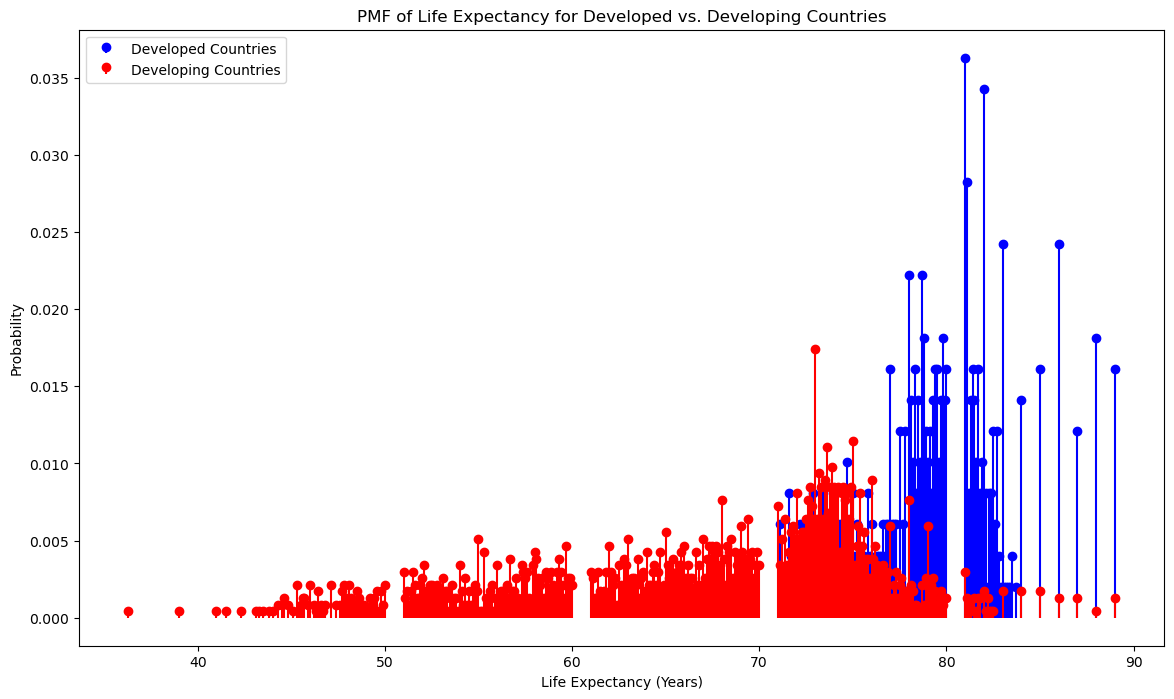

In [38]:
plt.figure(figsize=(14, 8))

# Plot PMF for Developed countries
plt.stem(developed_life_exp_values, developed_pmf, linefmt='b-', markerfmt='bo', basefmt=" ", label='Developed Countries')

# Plot PMF for Developing countries
plt.stem(developing_life_exp_values, developing_pmf, linefmt='r-', markerfmt='ro', basefmt=" ", label='Developing Countries')

plt.title('PMF of Life Expectancy for Developed vs. Developing Countries')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Probability')
plt.legend()
plt.show()


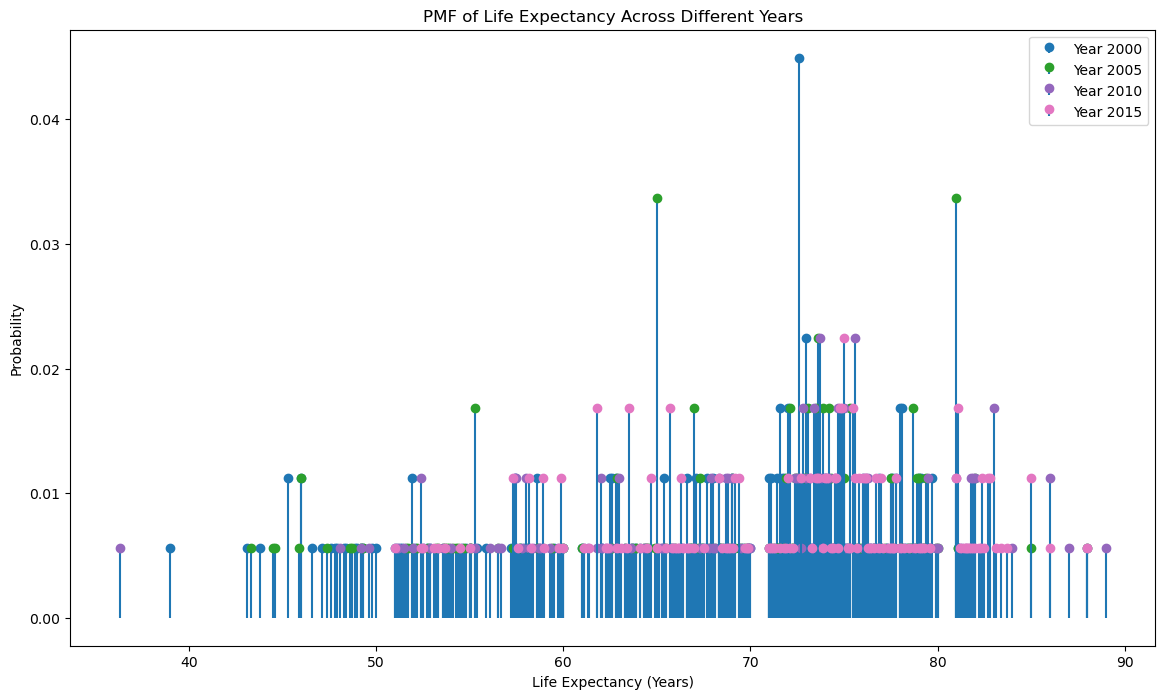

In [39]:
# Select a few representative years for comparison
selected_years = [2000, 2005, 2010, 2015]

# Calculate PMFs for each selected year
year_pmf_data = {}
for year in selected_years:
    year_data = data[data['Year'] == year]['Life expectancy'].dropna()
    values, pmf = calculate_pmf(year_data)
    year_pmf_data[year] = (values, pmf)

plt.figure(figsize=(14, 8))

# Plot PMFs for each selected year
for year, (values, pmf) in year_pmf_data.items():
    plt.stem(values, pmf, linefmt='-', markerfmt='o', basefmt=" ", label=f'Year {year}')

plt.title('PMF of Life Expectancy Across Different Years')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Probability')
plt.legend()
plt.show()


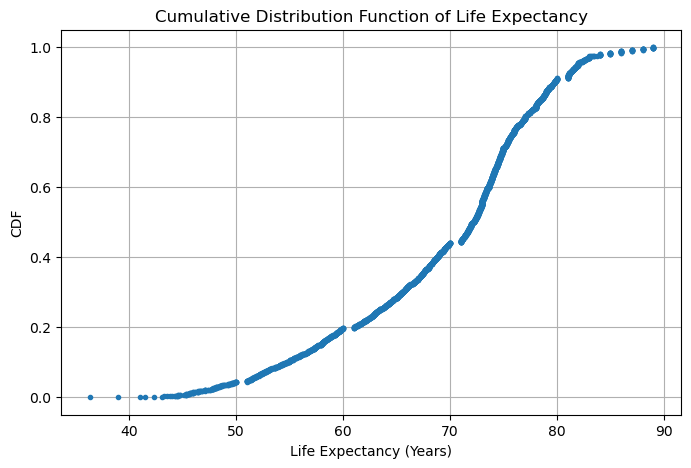

In [40]:
# Select the 'Life expectancy' column
life_expectancy = data['Life expectancy'].dropna()

# Calculate the CDF
x = np.sort(life_expectancy)
y = np.arange(1, len(x)+1) / len(x)

# Create the CDF plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Life Expectancy')
plt.grid(True)
plt.show()


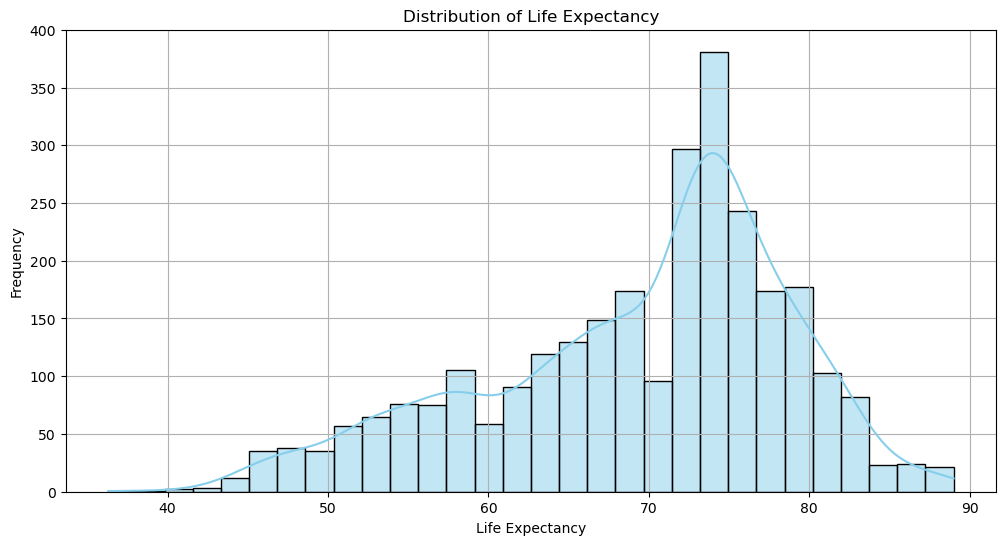

(69.34740168539325, 9.528332416616395, 36.3, 89.0)

In [41]:
# Plotting the distribution of Life Expectancy
plt.figure(figsize=(12, 6))
sns.histplot(data['Life expectancy'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate basic statistics
mean_life_expectancy = data['Life expectancy'].mean()
std_life_expectancy = data['Life expectancy'].std()
min_life_expectancy = data['Life expectancy'].min()
max_life_expectancy = data['Life expectancy'].max()

mean_life_expectancy, std_life_expectancy, min_life_expectancy, max_life_expectancy


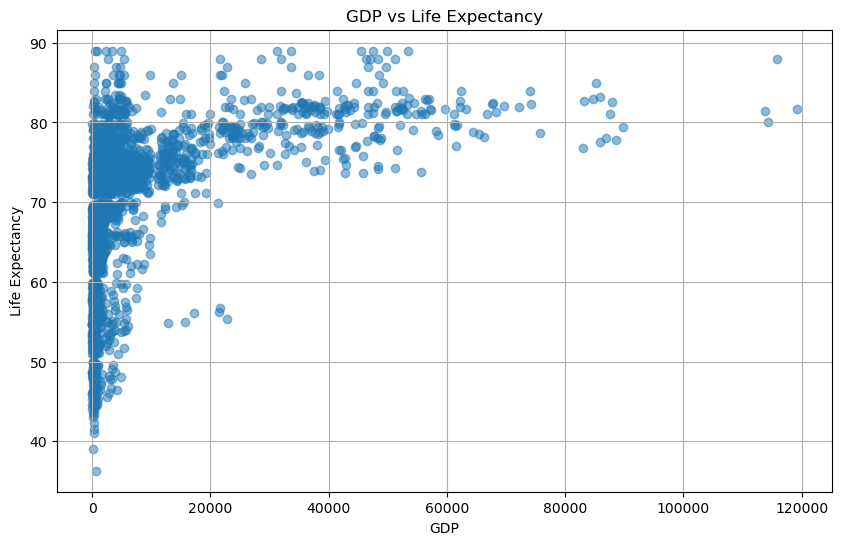

(array([[        nan,         nan],
        [        nan, 90.75724044]]),
 nan)

In [42]:
# Scatter plot for GDP and Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(data['GDP'], data['Life expectancy'], alpha=0.5)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Calculate covariance and Pearson's correlation for GDP and Life Expectancy
covariance_gdp_life_exp = np.cov(data['GDP'], data['Life expectancy'], ddof=0)
pearson_corr_gdp_life_exp = np.corrcoef(data['GDP'], data['Life expectancy'])

(covariance_gdp_life_exp, pearson_corr_gdp_life_exp[0, 1])


In [43]:
# Remove rows with NaN values in either GDP or Life Expectancy
clean_data = data[['GDP', 'Life expectancy']].dropna()

# Calculate covariance and Pearson's correlation for GDP and Life Expectancy on cleaned data
covariance_gdp_life_exp_cleaned = np.cov(clean_data['GDP'], clean_data['Life expectancy'], ddof=0)
pearson_corr_gdp_life_exp_cleaned = np.corrcoef(clean_data['GDP'], clean_data['Life expectancy'])

(covariance_gdp_life_exp_cleaned, pearson_corr_gdp_life_exp_cleaned[0, 1])


(array([[2.09185172e+08, 6.42576809e+04],
        [6.42576809e+04, 9.31154026e+01]]),
 0.4604143342046528)

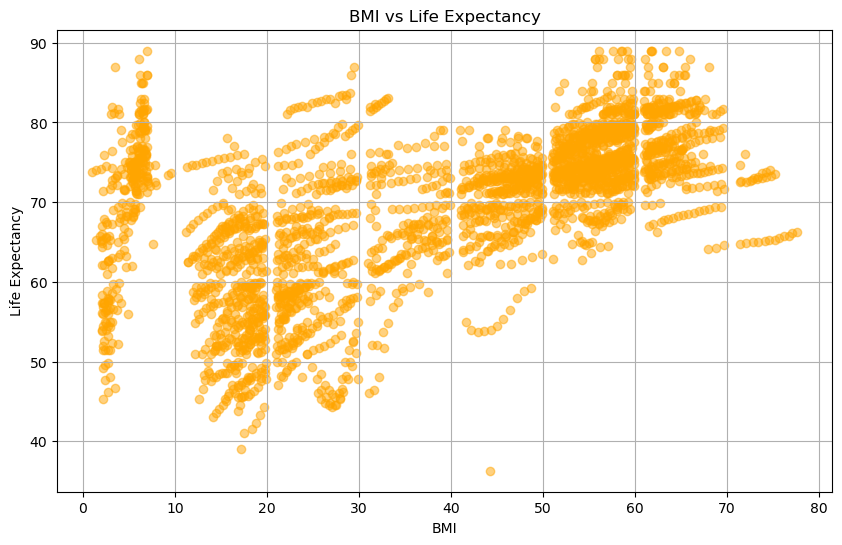

(array([[398.07998507, 107.4591756 ],
        [107.4591756 ,  90.02340332]]),
 0.567649970460406)

In [44]:
# Scatter plot for BMI and Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(data['BMI'], data['Life expectancy'], alpha=0.5, color='orange')
plt.title('BMI vs Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Remove rows with NaN values in either BMI or Life Expectancy for accurate calculations
clean_data_bmi_life_exp = data[['BMI', 'Life expectancy']].dropna()

# Calculate covariance and Pearson's correlation for BMI and Life Expectancy on cleaned data
covariance_bmi_life_exp = np.cov(clean_data_bmi_life_exp['BMI'], clean_data_bmi_life_exp['Life expectancy'], ddof=0)
pearson_corr_bmi_life_exp = np.corrcoef(clean_data_bmi_life_exp['BMI'], clean_data_bmi_life_exp['Life expectancy'])

(covariance_bmi_life_exp, pearson_corr_bmi_life_exp[0, 1])


In [45]:
# Filter the data for 'Developing' and 'Developed' countries
developing_countries = data[data['Status'] == 'Developing']['Life expectancy']
developed_countries = data[data['Status'] == 'Developed']['Life expectancy']

# Calculate the observed difference in mean life expectancy
observed_difference = np.mean(developed_countries) - np.mean(developing_countries)

# Permutation test
n_permutations = 10000
permutation_differences = []

for _ in range(n_permutations):
    # Combine the data
    combined_data = np.concatenate((developing_countries, developed_countries))
    # Permute the combined data
    np.random.shuffle(combined_data)
    # Split the permuted data
    perm_developing = combined_data[:len(developing_countries)]
    perm_developed = combined_data[len(developing_countries):]
    # Calculate the difference in means for the permutation
    permutation_difference = np.mean(perm_developed) - np.mean(perm_developing)
    permutation_differences.append(permutation_difference)

# Calculate the p-value
p_value = np.mean(np.abs(permutation_differences) >= np.abs(observed_difference))

observed_difference, p_value


(12.14128538512179, 0.0)

In [50]:
# Remove rows with missing values in 'Life expectancy' or 'GDP'
cleaned_data = data[['Life expectancy', 'GDP']].dropna()

# Define the dependent variable (y) and the explanatory variable (x)
y = cleaned_data['Life expectancy'].values.reshape(-1, 1)
x = cleaned_data['GDP'].values.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict the Life expectancy on the testing set
y_pred = model.predict(x_test)

# Calculate the model performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Coefficients
coef = model.coef_[0][0]
intercept = model.intercept_[0]

r2, mse, coef, intercept



(0.20616002776493747,
 75.93195281862894,
 0.0003033753209771725,
 67.15667377621511)

In [52]:
# Selecting the variables for the multiple regression analysis and dropping rows with any missing values
selected_columns = ['Life expectancy', 'GDP', 'Schooling', 'Alcohol', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS']
multiple_regression_data = data[selected_columns].dropna()

# Defining the dependent variable (y) and explanatory variables (X)
y_mr = multiple_regression_data['Life expectancy']
X_mr = multiple_regression_data.drop('Life expectancy', axis=1)

# Standardizing the explanatory variables to improve the regression performance
scaler = StandardScaler()
X_mr_scaled = scaler.fit_transform(X_mr)

# Split the data into training and testing sets
X_train_mr, X_test_mr, y_train_mr, y_test_mr = train_test_split(X_mr_scaled, y_mr, test_size=0.2, random_state=42)

# Initialize and fit the Multiple Regression model
model_mr = LinearRegression()
model_mr.fit(X_train_mr, y_train_mr)

# Predict the Life expectancy on the testing set
y_pred_mr = model_mr.predict(X_test_mr)

# Calculate the model performance metrics for the multiple regression
r2_mr = r2_score(y_test_mr, y_pred_mr)
mse_mr = mean_squared_error(y_test_mr, y_pred_mr)

r2_mr, mse_mr


(0.7930831313709072, 20.68334490380953)